<a href="https://colab.research.google.com/github/Vaibhav-XD/comcast-tele-communication-/blob/main/comcast_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Orange is an American global telecommunication company. The firm has been providing terrible customer service. They continue to fall short despite repeated promises to improve. Only last month (October 2016) the authority fined them a $2.3 million, after receiving over 1000 consumer complaints.

The existing database will serve as a repository of public customer complaints filed against Orange.

It will help to pin down what is wrong with Orange's customer service.

**`Data Dictionary`**

1. Ticket #: Ticket number assigned to each complaint
2. Customer Complaint: Description of complaint
3. Date: Date of complaint
4. Time: Time of complaint
5. Received Via: Mode of communication of the complaint
6. City: Customer city
7. State: Customer state
8. Zipcode: Customer zip
9. Status: Status of complaint
10. Filing on behalf of someone

### Analysis Task

> Import data into environment.

> Provide the trend chart for the number of complaints at monthly and daily granularity levels.

> Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

> Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:
>> Which state has the maximum complaints

>> Which state has the highest percentage of unresolved complaints

> Provide a table with the frequency of complaint types.
*Which complaint types are maximum i.e., around internet, network issues, or across any other domains*.

Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

**The analysis results to be provided with insights wherever applicable**.

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#importing dataset
df = pd.read_csv("Orange_telecom_complaints_data.csv")

In [ ]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [ ]:
#checking data types of all 
df.dtypes

Ticket #                       object
Customer Complaint             object
Date                           object
Date_month_year                object
Time                           object
Received Via                   object
City                           object
State                          object
Zip code                        int64
Status                         object
Filing on Behalf of Someone    object
dtype: object

In [ ]:
#create time based indexing , so can perform time series analysis 
df["date_index"] = df["Date_month_year"] + " " + df["Time"]

In [ ]:
#convert necessary field to datatime before it was in object form that is our of no use 
df["date_index"] = pd.to_datetime(df["date_index"])
df["Date_month_year"] = pd.to_datetime(df["Date_month_year"])

In [ ]:
#checking if data dypes changed or not 
df.dtypes

Ticket #                               object
Customer Complaint                     object
Date                                   object
Date_month_year                datetime64[ns]
Time                                   object
Received Via                           object
City                                   object
State                                  object
Zip code                                int64
Status                                 object
Filing on Behalf of Someone            object
date_index                     datetime64[ns]
dtype: object

In [ ]:
#setting index to date_index
df = df.set_index(df["date_index"])

In [ ]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_index
date_index,,,,,,,,,,,,
2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50
2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56
2015-04-18 09:55:47,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47
2015-07-05 11:59:35,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35
2015-05-26 13:25:26,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26


In [ ]:
df["Date_month_year"].value_counts()[:6]

2015-06-24    218
2015-06-23    190
2015-06-25     98
2015-06-26     55
2015-06-30     53
2015-06-29     51
Name: Date_month_year, dtype: int64

date_index
2015-01-04    18
2015-01-05    12
2015-01-06    25
2015-01-07     0
2015-01-08     0
Freq: D, dtype: int64


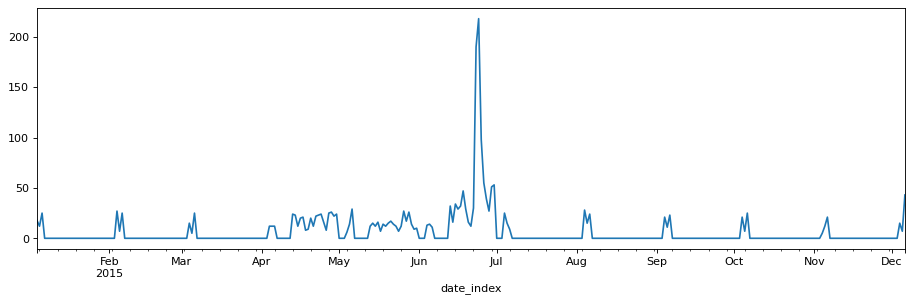

In [ ]:
#checking complaints - date wise / daily basis
from matplotlib.pyplot import figure
figure(figsize=(14,4), dpi=80)

#fd = df["Date_month_year"].value_counts()
#print(fd.head())
#fd.plot();

# or 

fd = df.groupby(pd.Grouper(freq="D")).size()
print(fd.head())
fd.plot();

In [ ]:
#checking on monthly basis 
fm = df.groupby(pd.Grouper(freq="M")).size()

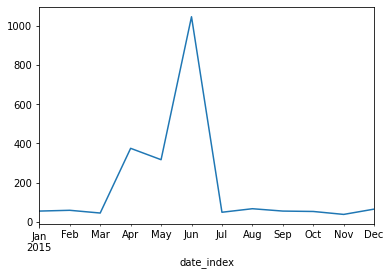

In [ ]:
#plotting monthly wise 
fm.plot();

In [ ]:
#checking status
df.Status.unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [ ]:
## Create a new categorical variable with value as Open and Closed. 
## Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

df["new_status"] = ["Open" if Status =="Open" or Status== "Pending" else "Closed" for Status in df["Status"]]

In [ ]:
df.head(2)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_index,new_status
date_index,,,,,,,,,,,,,
2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50,Closed
2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56,Closed


In [ ]:
## Provide state wise status of complaints in a stacked bar chart. 
## Use the categorized variable from above data. Provide insights on:


## 1. Which state has the maximum complaints
## 2. Which state has the highest percentage of unresolved complaints


df.groupby(["State"]).size().sort_values(ascending=False).to_frame().reset_index().rename({0: "Count"}, axis=1)[ : 5]
#df.groupby(["State"]).size().sort_values(ascending=False)[:5]



,State,Count
0,Georgia,288
1,Florida,240
2,California,220
3,Illinois,164
4,Tennessee,143


In [ ]:
# finding States wise - status of  complaints
Status_complaint = df.groupby(["State","new_status"]).size().unstack().fillna(0)
Status_complaint

new_status,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,0.0


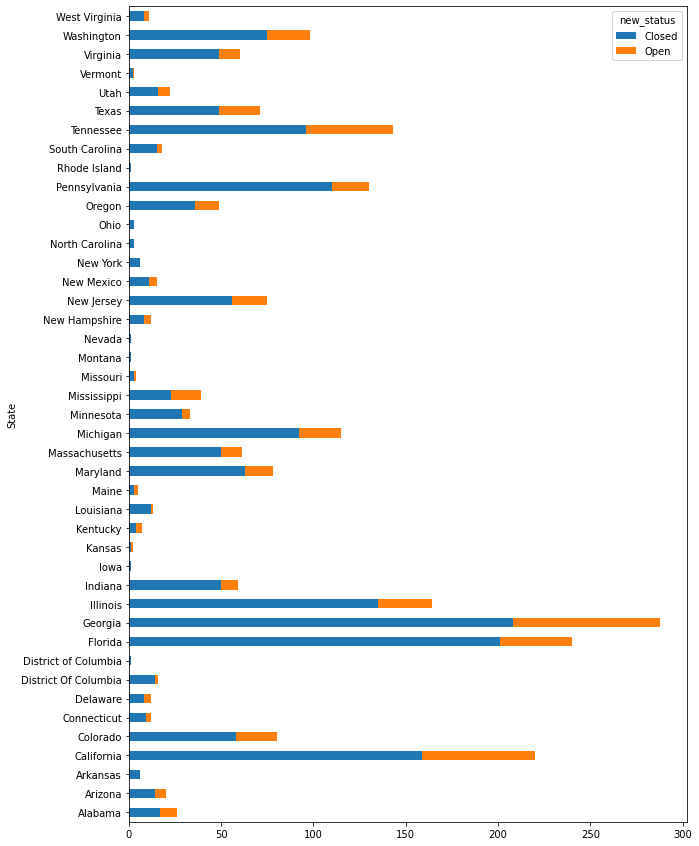

In [ ]:
#plotting state wise status of open and closed complaints
Status_complaint.plot(kind="barh",figsize=(10,15), stacked =True)

In [ ]:
#state wise 
df.groupby(["State"]).size().sort_values(ascending=False).to_frame().reset_index().rename({0:"count"},axis=1)[:5]

,State,count
0,Georgia,288
1,Florida,240
2,California,220
3,Illinois,164
4,Tennessee,143


In [ ]:
#maxx state wise complanits open and closed 
df.groupby(["State","new_status"]).size().unstack().fillna(0).max()

new_status
Closed    208.0
Open       80.0
dtype: float64

# Which state has the highest percentage of unresolved complaints

In [ ]:
# now we do the sorting of the data and show the data in State-percent wise
Status_complaint = df.groupby(["State","new_status"]).size().unstack().fillna(0) #fillna for filling null values
Status_complaint['% Unresolved Complaints']=np.divide(Status_complaint['Open'],np.add(Status_complaint['Open'],Status_complaint['Closed']))*100
Status_complaint = Status_complaint.sort_values(by='% Unresolved Complaints',ascending=False)
Status_complaint.head(10)

new_status,Closed,Open,% Unresolved Complaints
State,,,
Kansas,1.0,1.0,50.000000
Kentucky,4.0,3.0,42.857143
Mississippi,23.0,16.0,41.025641
Maine,3.0,2.0,40.000000
Alabama,17.0,9.0,34.615385
Vermont,2.0,1.0,33.333333
Delaware,8.0,4.0,33.333333
New Hampshire,8.0,4.0,33.333333
Tennessee,96.0,47.0,32.867133


In [ ]:
#importing gensim and its necessary libraries

import gensim
from gensim import corpora
from pprint import pprint
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string

import nltk
nltk.download('stopwords')

stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#we are removing punctuation and stop words from the complaints with lemmatize
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = "" .join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

In [ ]:
#converting "Customer Complaint" to unique words(tokenID) and splitting 
import nltk 
nltk.download('wordnet')
nltk.download('omw-1.4')

doc_complete = df["Customer Complaint"].tolist()
doc_clean = [clean(doc).split() for doc in doc_complete]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
#importing corpora liberary 
from gensim import corpora

In [ ]:
#we have found 1412 unique tokens 
dictionary = corpora.Dictionary(doc_clean)
print(dictionary)

Dictionary(1412 unique tokens: ['cable', 'comcast', 'internet', 'speed', 'disappear']...)


In [ ]:
#showing frequency of bag of words 
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
doc_term_matrix[:5]

[[(0, 1), (1, 1), (2, 1), (3, 1)],
 [(4, 1), (5, 1), (6, 1), (7, 1), (8, 1)],
 [(3, 1), (8, 1)],
 [(1, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1)],
 [(1, 1), (8, 1), (16, 1), (17, 1)]]

In [ ]:
#importing LdaModel and executing it 
from gensim.models import LdaModel
Num_Topic = 9
ldamodel = LdaModel(doc_term_matrix, num_topics= Num_Topic, id2word = dictionary, passes = 30)

In [ ]:
topics = ldamodel.show_topics() #0.149*"comcast" + 0.145*"billing" + 0.136*"service"
for topic in topics:
  print(topic)
  print()

(0, '0.169*"internet" + 0.147*"comcast" + 0.111*"service" + 0.057*"issue" + 0.034*"billing" + 0.024*"customer" + 0.010*"business" + 0.010*"year" + 0.009*"terrible" + 0.008*"modem"')

(1, '0.239*"comcast" + 0.126*"data" + 0.102*"cap" + 0.045*"charge" + 0.034*"complaint" + 0.024*"usage" + 0.017*"xfinity" + 0.015*"fee" + 0.011*"fraudulent" + 0.011*"overage"')

(2, '0.045*"comcast" + 0.042*"help" + 0.038*"access" + 0.031*"false" + 0.024*"lack" + 0.023*"rate" + 0.023*"please" + 0.020*"hbo" + 0.020*"go" + 0.017*"xfinity"')

(3, '0.131*"billing" + 0.110*"comcast" + 0.065*"service" + 0.052*"practice" + 0.037*"bill" + 0.031*"unfair" + 0.025*"cable" + 0.024*"complaint" + 0.019*"problem" + 0.018*"comcastxfinity"')

(4, '0.081*"comcast" + 0.035*"monopoly" + 0.031*"show" + 0.027*"day" + 0.026*"refund" + 0.024*"appointment" + 0.021*"call" + 0.021*"said" + 0.019*"throttled" + 0.017*"overcharge"')

(5, '0.206*"service" + 0.056*"poor" + 0.043*"xfinity" + 0.042*"customer" + 0.028*"connection" + 0.025*"c

In [ ]:
word_dict = {}
for i in range(Num_Topic):
    words = ldamodel.show_topic(i, topn =10)
    word_dict["topic # " + "{}".format(i)] = [i[0] for i in words]

In [ ]:
#showing the main results
pd.DataFrame(word_dict)


,topic # 0,topic # 1,topic # 2,topic # 3,topic # 4,topic # 5,topic # 6,topic # 7,topic # 8
0,internet,comcast,comcast,billing,comcast,service,comcast,comcast,internet
1,comcast,data,help,comcast,monopoly,poor,pay,internet,speed
2,service,cap,access,service,show,xfinity,bandwidth,speed,comcast
3,issue,charge,false,practice,day,customer,without,throttling,slow
4,billing,complaint,lack,bill,refund,connection,email,pricing,service
5,customer,usage,rate,unfair,appointment,credit,12,service,outage
6,business,xfinity,please,cable,call,paying,one,promised,switch
7,year,fee,hbo,complaint,said,phone,month,unfair,high
8,terrible,fraudulent,go,problem,throttled,failure,scam,without,charged
9,modem,overage,xfinity,comcastxfinity,overcharge,unreliable,throttle,low,bait


# This types of complaints came from the Telecoms consumers 
